In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Obtener los datos de la Gustavo A Madero

In [2]:
datos = pd.read_csv('../Archivos/carpetas-de-investigacion-pgj-cdmx.csv')
datos.head()

,año_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalía,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,Geopoint
0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"


In [48]:
data2 = crimenes[crimenes['categoria_delito']=='DELITO DE BAJO IMPACTO']
grupo_temp = data2.groupby(['delito', 'ao_inicio']).size().to_frame().unstack('ao_inicio').fillna(0).astype('int32')
grupo_temp.to_excel('cuenta_delitos.xlsx')

In [3]:
datos = datos[datos['alcaldia_hechos']=='GUSTAVO A MADERO']
len(datos)

80097

Observamos el total de datos nulos por fila en al menos una celda (o columna)

In [4]:
pd.isnull(datos).values.ravel().sum()

48612

Eliminamos la fila en donde la columna **colonia_hechos** tiene valor NA

In [5]:
crimenes = datos[datos['colonia_hechos'].notna()]#datos.dropna(axis=0, how="any")
len(crimenes)

77079

## Visualización general de los datos

Obtenemos el total de delitos por **categoria_delito**

In [6]:
crimenes.groupby('categoria_delito').size().to_frame()

,0
categoria_delito,
DELITO DE BAJO IMPACTO,57957
HECHO NO DELICTIVO,4651
HOMICIDIO DOLOSO,639
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,406
ROBO A CASA HABITACIÓN CON VIOLENCIA,240
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,182
ROBO A NEGOCIO CON VIOLENCIA,1368
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,419
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,73


Obtenemos el total de delitos por **categoria_delito** y cada una separada por año. Luego pasamos los grupos ''ao_inicio'' a columnas. Y se hace un casteo a entero ya que la suma del total de datos la devuelve como flotante.

Nota: Al momento de agrupar los que no tienen tamaño los rellena con NaN, es por eso que se rellenan con fillna.

In [34]:
tabla_crimenes = crimenes.groupby(['categoria_delito', 'ao_inicio']).size().to_frame().unstack('ao_inicio').fillna(0).astype('int32')
tabla_crimenes

0                    
ao_inicio                                            2016   2017   2018  2019
categoria_delito                                                             
DELITO DE BAJO IMPACTO                              13539  16291  18825  9302
HECHO NO DELICTIVO                                    994   1953   1454   250
HOMICIDIO DOLOSO                                      130    173    222   114
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO          85     89    150    82
ROBO A CASA HABITACIÓN CON VIOLENCIA                   65     49     75    51
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON V...     40     50     56    36
ROBO A NEGOCIO CON VIOLENCIA                          378    311    331   348
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN V...    119    116    113    71
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA          17     15     20    21
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIO...     29     59     34   119
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                 263    267    296   240
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...    860    724   1036   898
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA               24     15     14     9
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                 1883   1530   1703   937
SECUESTRO                                               3      1      0     7
VIOLACIÓN                                              41     36     68    48

## Ordenar visualización de datos por colonia

In [24]:
import matplotlib.pyplot as plt
crimenes['ao_inicio'].unique()

array([2016, 2018, 2017, 2019], dtype=int64)

Obtenemos el total de delitos por **colonia_hechos** y cada una separada por año. Luego pasamos los grupos ''ao_inicio'' a columnas. Y se hace un casteo a entero ya que la suma del total de datos la devuelve como flotante.

Nota: Al momento de agrupar los que no tienen tamaño los rellena con NaN, es por eso que se rellenan con fillna.

In [30]:
tabla_colonias = crimenes.groupby(['colonia_hechos', 'ao_inicio']).size().to_frame().unstack('ao_inicio').fillna(0).astype(int)
tabla_colonias

0               
ao_inicio              2016 2017 2018 2019
colonia_hechos                            
15 DE AGOSTO             65  105   92   41
25 DE JULIO              67   77   85   46
6 DE JUNIO               18   13   21   10
7 DE NOVIEMBRE           95   99  120   46
ACUEDUCTO DE GUADALUPE  109  161  211   98
...                     ...  ...  ...  ...
VILLA HERMOSA            18   19   18    9
VISTA HERMOSA            10   16   24   16
VISTA HERMOSA I           0    0    0    2
ZONA ESCOLAR            286  261  250  144
ZONA ESCOLAR ORIENTE     85   90   96   65

[193 rows x 4 columns]

Obtenemos las colonias de los grupos formados.

In [31]:
tabla_colonias.index.get_level_values(0)

Index(['15 DE AGOSTO', '25 DE JULIO', '6 DE JUNIO', '7 DE NOVIEMBRE',
       'ACUEDUCTO DE GUADALUPE', 'AHUEHUETES',
       'AMPLIACION SAN JUAN DE ARAGON CTM', 'AMPLIACIÓN BENITO JUÁREZ',
       'AMPLIACIÓN CASAS ALEMÁN', 'AMPLIACIÓN EMILIANO ZAPATA',
       ...
       'VASCO DE QUIROGA', 'VERONICA CASTRO', 'VILLA DE ARAGÓN',
       'VILLA ESMERALDA', 'VILLA GUSTAVO A. MADERO', 'VILLA HERMOSA',
       'VISTA HERMOSA', 'VISTA HERMOSA I', 'ZONA ESCOLAR',
       'ZONA ESCOLAR ORIENTE'],
      dtype='object', name='colonia_hechos', length=193)

In [27]:
tabla_colonias.loc['ZONA ESCOLAR',:]

   ao_inicio
0  2016         286
   2017         261
   2018         250
   2019         144
Name: ZONA ESCOLAR, dtype: int32

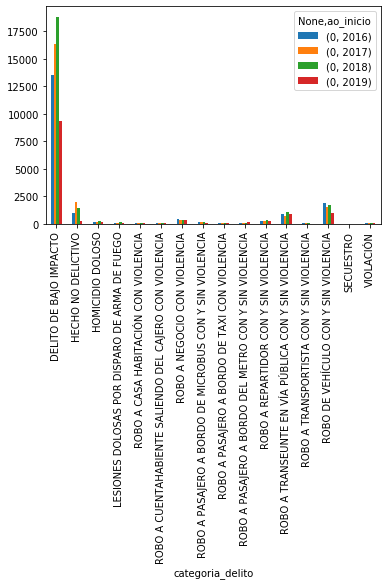

In [35]:
tabla_crimenes.plot(kind='bar')

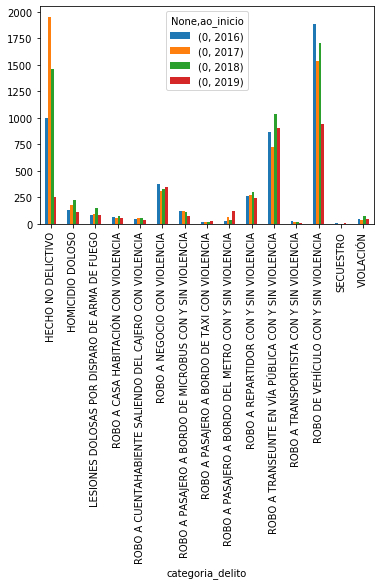

In [36]:
tabla_crimenes.drop('DELITO DE BAJO IMPACTO').plot(kind='bar')

In [15]:
crimenes.groupby(['colonia_hechos','categoria_delito', 'ao_inicio']).size().to_frame().unstack('ao_inicio').fillna(0)

0  \
ao_inicio                                                                2016   
colonia_hechos       categoria_delito                                           
15 DE AGOSTO         DELITO DE BAJO IMPACTO                              42.0   
                     HECHO NO DELICTIVO                                   6.0   
                     HOMICIDIO DOLOSO                                     0.0   
                     LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO        1.0   
                     ROBO A CASA HABITACIÓN CON VIOLENCIA                 0.0   
...                                                                       ...   
ZONA ESCOLAR ORIENTE ROBO A NEGOCIO CON VIOLENCIA                         2.0   
                     ROBO A REPARTIDOR CON Y SIN VIOLENCIA                3.0   
                     ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...   9.0   
                     ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                 8.0   
                     VIOLACIÓN                                            1.0   

                                                                               \
ao_inicio                                                                2017   
colonia_hechos       categoria_delito                                           
15 DE AGOSTO         DELITO DE BAJO IMPACTO                              71.0   
                     HECHO NO DELICTIVO                                  11.0   
                     HOMICIDIO DOLOSO                                     1.0   
                     LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO        0.0   
                     ROBO A CASA HABITACIÓN CON VIOLENCIA                 1.0   
...                                                                       ...   
ZONA ESCOLAR ORIENTE ROBO A NEGOCIO CON VIOLENCIA                         0.0   
                     ROBO A REPARTIDOR CON Y SIN VIOLENCIA                2.0   
                     ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...   3.0   
                     ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                10.0   
                     VIOLACIÓN                                            0.0   

                                                                               \
ao_inicio                                                                2018   
colonia_hechos       categoria_delito                                           
15 DE AGOSTO         DELITO DE BAJO IMPACTO                              72.0   
                     HECHO NO DELICTIVO                                   6.0   
                     HOMICIDIO DOLOSO                                     0.0   
                     LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO        0.0   
                     ROBO A CASA HABITACIÓN CON VIOLENCIA                 1.0   
...                                                                       ...   
ZONA ESCOLAR ORIENTE ROBO A NEGOCIO CON VIOLENCIA                         1.0   
                     ROBO A REPARTIDOR CON Y SIN VIOLENCIA                0.0   
                     ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...   4.0   
                     ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                 3.0   
                     VIOLACIÓN                                            0.0   

                                                                               
ao_inicio                                                                2019  
colonia_hechos       categoria_delito                                          
15 DE AGOSTO         DELITO DE BAJO IMPACTO                              26.0  
                     HECHO NO DELICTIVO                                   1.0  
                     HOMICIDIO DOLOSO                                     0.0  
                     LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO        0.0  
                     ROBO A CASA HABITACIÓN CON VIOLENCIA                 0.0  
...                            